In [1]:
install.packages("tidyr")
install.packages("psych")
install.packages("car")
install.packages("lmtest")
install.packages("tseries")
library(tseries)
library("lmtest")
library("car")
library("psych")
library("tidyr")
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit



Attaching package: ‘dplyr’


The following o

##Wczytanie danych

In [50]:
dane <- read.csv2("/content/ceny_produktow_rolniczych.csv")
dane <- dane %>% select(-X, -Okresy, -Rok)

In [51]:
names(dane) <- c("jeczmien", "pszenzyto", "owies", "kukurydza", "bydlo", "mleko")

In [52]:
str(dane)

'data.frame':	84 obs. of  6 variables:
 $ jeczmien : num  67.6 67.3 67.1 67.3 66.2 ...
 $ pszenzyto: num  62.1 61.4 61.9 62.4 62.4 ...
 $ owies    : num  52 52.3 51.9 51.9 53.3 ...
 $ kukurydza: num  59.6 60.5 61.8 62.4 64.8 ...
 $ bydlo    : num  6.58 6.47 6.34 6.58 6.63 6.49 6.42 6.52 6.48 6.51 ...
 $ mleko    : num  142 135 134 132 129 ...


### określenie zbiorów

In [53]:
trening = dane[1:67,]
test = dane[68:83,]

In [54]:
head(trening)

,jeczmien,pszenzyto,owies,kukurydza,bydlo,mleko
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67.59,62.06,52.01,59.65,6.58,142.12
2,67.33,61.37,52.29,60.46,6.47,135.24
3,67.08,61.86,51.87,61.81,6.34,134.20
4,67.35,62.37,51.85,62.35,6.58,132.17
5,66.19,62.44,53.30,64.78,6.63,129.20
6,65.47,63.72,54.41,67.09,6.49,128.52


## Model ekonometryczny

CEL: modelujemy wpływ cen zboża na cene mleka

zmienna zależna -- cena mleka

zmienne niezależne -- ceny zboża, plus cena bydła

In [146]:
colSums(is.na(trening))  # NA dla każdej kolumny
colSums(is.na(test))

jeczmien pszenzyto     owies kukurydza     bydlo     mleko 
        0         0         0         0         0         0

jeczmien pszenzyto     owies kukurydza     bydlo     mleko 
        0         0         0         0         0         0

## Dobór zmiennych objaśniających - regresja krokowa

Idea doboru zmiennych
objaśniających:

• możliwie silnie skorelowane ze zmienną
objaśnianą (y)

• możliwie słabo skorelowane między sobą

### Zboża

In [163]:
model = lm(mleko ~ . -bydlo, data = trening)
summary(model)


Call:
lm(formula = mleko ~ . - bydlo, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6502  -8.3957   0.2675   7.7496  22.2127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  43.1886     6.6926   6.453 1.88e-08 ***
jeczmien     -0.5750     0.4813  -1.195    0.237    
pszenzyto     0.4534     0.4124   1.099    0.276    
owies         1.5283     0.2074   7.368 4.95e-10 ***
kukurydza     0.1916     0.1435   1.336    0.186    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.35 on 62 degrees of freedom
Multiple R-squared:  0.9174,	Adjusted R-squared:  0.912 
F-statistic: 172.1 on 4 and 62 DF,  p-value: < 2.2e-16


In [164]:
# Obliczenie współczynników VIF
vif_values <- vif(model)
print(vif_values)

 jeczmien pszenzyto     owies kukurydza 
63.022286 56.511534 11.190247  5.733082 


In [165]:
#usunięcie zmiennej pszenzyto (max pvalue)
model2 = lm(mleko ~ owies + kukurydza + jeczmien, data = trening)
summary(model2)


Call:
lm(formula = mleko ~ owies + kukurydza + jeczmien, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.6123  -6.7410  -0.0153   7.9660  22.3142 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.1696     5.6155   6.975 2.21e-09 ***
owies         1.5229     0.2077   7.332 5.26e-10 ***
kukurydza     0.2370     0.1376   1.722    0.090 .  
jeczmien     -0.1150     0.2383  -0.482    0.631    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.37 on 63 degrees of freedom
Multiple R-squared:  0.9157,	Adjusted R-squared:  0.9117 
F-statistic: 228.2 on 3 and 63 DF,  p-value: < 2.2e-16


In [166]:
#usunięcie zmiennej jeczmien
model3 = lm(mleko~owies+kukurydza, data = trening)
summary(model3)


Call:
lm(formula = mleko ~ owies + kukurydza, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3199  -6.9842  -0.4101   7.9162  23.2962 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.3887     5.3447   7.183 8.89e-10 ***
owies         1.4416     0.1207  11.948  < 2e-16 ***
kukurydza     0.2022     0.1166   1.735   0.0876 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 64 degrees of freedom
Multiple R-squared:  0.9154,	Adjusted R-squared:  0.9128 
F-statistic: 346.4 on 2 and 64 DF,  p-value: < 2.2e-16


In [296]:
model4 = lm(mleko~owies, data = trening)
summary(model4)


Call:
lm(formula = mleko ~ log(owies), data = trening)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.180 -11.283   3.312  11.119  28.868 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -409.812     26.360  -15.55   <2e-16 ***
log(owies)   134.210      6.146   21.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.53 on 65 degrees of freedom
Multiple R-squared:  0.8801,	Adjusted R-squared:  0.8782 
F-statistic: 476.9 on 1 and 65 DF,  p-value: < 2.2e-16


$y = \alpha_0 + \alpha_1 \cdot owies +\epsilon$

$mleko = 42.09 + 1.62 \cdot owies + \epsilon$

### Automatyczny dobór zmiennych

In [81]:
# automatyczna regresja krokowa z użyciem kryterium AIC
full_model <- lm(mleko ~ . -bydlo, data = trening)
model_auto <- step(full_model, direction = "both", trace = FALSE)

summary(model_auto)


Call:
lm(formula = mleko ~ owies + kukurydza, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3199  -6.9842  -0.4101   7.9162  23.2962 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.3887     5.3447   7.183 8.89e-10 ***
owies         1.4416     0.1207  11.948  < 2e-16 ***
kukurydza     0.2022     0.1166   1.735   0.0876 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 64 degrees of freedom
Multiple R-squared:  0.9154,	Adjusted R-squared:  0.9128 
F-statistic: 346.4 on 2 and 64 DF,  p-value: < 2.2e-16


model otrzymany w wyniku regresji krokowej (oszacowane parametry modelu):

$y = \alpha_0 + \alpha_1 \cdot owies + \alpha_2 \cdot kukurydza +\epsilon$

$mleko = 38.38 + 1.44 \cdot owies + 0.2 \cdot kukurydza+ \epsilon$

In [82]:
# Obliczenie współczynników VIF
vif_values <- vif(model_auto)
print(vif_values)

    owies kukurydza 
 3.819687  3.819687 


In [154]:
model_m <- lm(mleko~bydlo, data=trening)
summary(model_m)


Call:
lm(formula = mleko ~ bydlo, data = trening)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.722  -6.924   0.275   3.734  49.442 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.4274     7.0276   0.915    0.364    
bydlo        20.1100     0.8678  23.175   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.78 on 65 degrees of freedom
Multiple R-squared:  0.892,	Adjusted R-squared:  0.8904 
F-statistic: 537.1 on 1 and 65 DF,  p-value: < 2.2e-16


### Zboża + bydło

In [168]:
model_all = lm(mleko ~ ., data = trening)
summary(model_all)


Call:
lm(formula = mleko ~ ., data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4296  -6.5450   0.0009   5.5834  26.0903 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.69326    7.02221   2.520   0.0144 *  
jeczmien     0.09940    0.40836   0.243   0.8085    
pszenzyto   -0.25546    0.35711  -0.715   0.4771    
owies        1.06233    0.18708   5.679 4.02e-07 ***
kukurydza   -0.05091    0.12398  -0.411   0.6828    
bydlo       10.73652    1.87119   5.738 3.21e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.03 on 61 degrees of freedom
Multiple R-squared:  0.9463,	Adjusted R-squared:  0.9419 
F-statistic: 215.1 on 5 and 61 DF,  p-value: < 2.2e-16


In [169]:
model_all_1 = lm(mleko ~ . - jeczmien, data = trening)
summary(model_all_1)


Call:
lm(formula = mleko ~ . - jeczmien, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6763  -6.6931  -0.1932   5.5263  26.4617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.7577     5.4525   3.440  0.00105 ** 
pszenzyto    -0.1789     0.1679  -1.066  0.29075    
owies         1.0846     0.1620   6.696 7.21e-09 ***
kukurydza    -0.0480     0.1225  -0.392  0.69642    
bydlo        10.6054     1.7784   5.964 1.28e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.954 on 62 degrees of freedom
Multiple R-squared:  0.9463,	Adjusted R-squared:  0.9428 
F-statistic:   273 on 4 and 62 DF,  p-value: < 2.2e-16


In [170]:
model_all_2 = lm(mleko ~ . - jeczmien - kukurydza, data = trening)
summary(model_all_2)


Call:
lm(formula = mleko ~ . - jeczmien - kukurydza, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7489  -6.4656  -0.2891   5.3471  26.1510 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.5900     5.3991   3.443  0.00103 ** 
pszenzyto    -0.2097     0.1474  -1.422  0.15999    
owies         1.0913     0.1600   6.822 4.08e-09 ***
bydlo        10.3764     1.6683   6.220 4.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.887 on 63 degrees of freedom
Multiple R-squared:  0.9461,	Adjusted R-squared:  0.9436 
F-statistic: 368.9 on 3 and 63 DF,  p-value: < 2.2e-16


In [171]:
model_all_3 = lm(mleko ~ owies + bydlo, data = trening)
summary(model_all_3)


Call:
lm(formula = mleko ~ owies + bydlo, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0807  -6.1648  -0.1011   6.1161  28.1162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.8521     5.3679   3.698 0.000453 ***
owies         0.9414     0.1212   7.765 8.36e-11 ***
bydlo         9.3613     1.5198   6.160 5.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.965 on 64 degrees of freedom
Multiple R-squared:  0.9444,	Adjusted R-squared:  0.9427 
F-statistic: 543.7 on 2 and 64 DF,  p-value: < 2.2e-16


model otrzymany w wyniku regresji krokowej (oszacowane parametry modelu):

$y = \alpha_0 + \alpha_1 \cdot owies + \alpha_2 \cdot bydło +\epsilon$

$mleko = 19.85 + 0.94 \cdot owies + 9.36 \cdot bydło + \epsilon$

In [172]:
# Obliczenie współczynników VIF
vif_values <- vif(model_all_3)
print(vif_values)

   owies    bydlo 
5.865865 5.865865 


### Automatyczny dobór zmiennych

In [88]:
# automatyczna regresja krokowa z użyciem kryterium AIC
full_model <- lm(mleko ~ ., data = trening)
model_auto_all <- step(full_model, direction = "both", trace = FALSE)

summary(model_auto_all)


Call:
lm(formula = mleko ~ pszenzyto + owies + bydlo, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7489  -6.4656  -0.2891   5.3471  26.1510 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.5900     5.3991   3.443  0.00103 ** 
pszenzyto    -0.2097     0.1474  -1.422  0.15999    
owies         1.0913     0.1600   6.822 4.08e-09 ***
bydlo        10.3764     1.6683   6.220 4.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.887 on 63 degrees of freedom
Multiple R-squared:  0.9461,	Adjusted R-squared:  0.9436 
F-statistic: 368.9 on 3 and 63 DF,  p-value: < 2.2e-16


$mleko = 18.59 + 1.09 \cdot owies + 10.37 \cdot bydło - 0.21 \cdot pszenżyto + \epsilon$

## Weryfikacja modelu

### Istotność współczynników

In [89]:
#weryfikacja modelu po regresji krokowej
summary(model4)


Call:
lm(formula = mleko ~ owies, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5708  -8.0780   0.6779   9.2273  22.9984 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.09881    4.97313   8.465 4.36e-12 ***
owies        1.62145    0.06268  25.867  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.48 on 65 degrees of freedom
Multiple R-squared:  0.9115,	Adjusted R-squared:  0.9101 
F-statistic: 669.1 on 1 and 65 DF,  p-value: < 2.2e-16


Współczynnik determinacja -- model wyjaśnia 91.15% zmienności ceny mleka

Odchylenie składnika losowego -- 12.48

Test F -- pvalue < 2.2e-16

In [90]:
summary(model_all_3)


Call:
lm(formula = mleko ~ owies + bydlo, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0807  -6.1648  -0.1011   6.1161  28.1162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.8521     5.3679   3.698 0.000453 ***
owies         0.9414     0.1212   7.765 8.36e-11 ***
bydlo         9.3613     1.5198   6.160 5.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.965 on 64 degrees of freedom
Multiple R-squared:  0.9444,	Adjusted R-squared:  0.9427 
F-statistic: 543.7 on 2 and 64 DF,  p-value: < 2.2e-16


Współczynnik determinacja -- model wyjaśnia 94.44% zmienności ceny mleka

Odchylenie składnika losowego -- 9.96

Test F -- pvalue < 2.2e-16

### Sprawdzenie założeń dotyczących reszt

Założenia:
- symetryczne,
- rozkład normalny
- jednorodne wariancje w grupach,
- brak autokorelacji,
- losowość

In [247]:
reszty_model4 = model4$residuals
reszty_model_all_3 = model_all_3$residuals

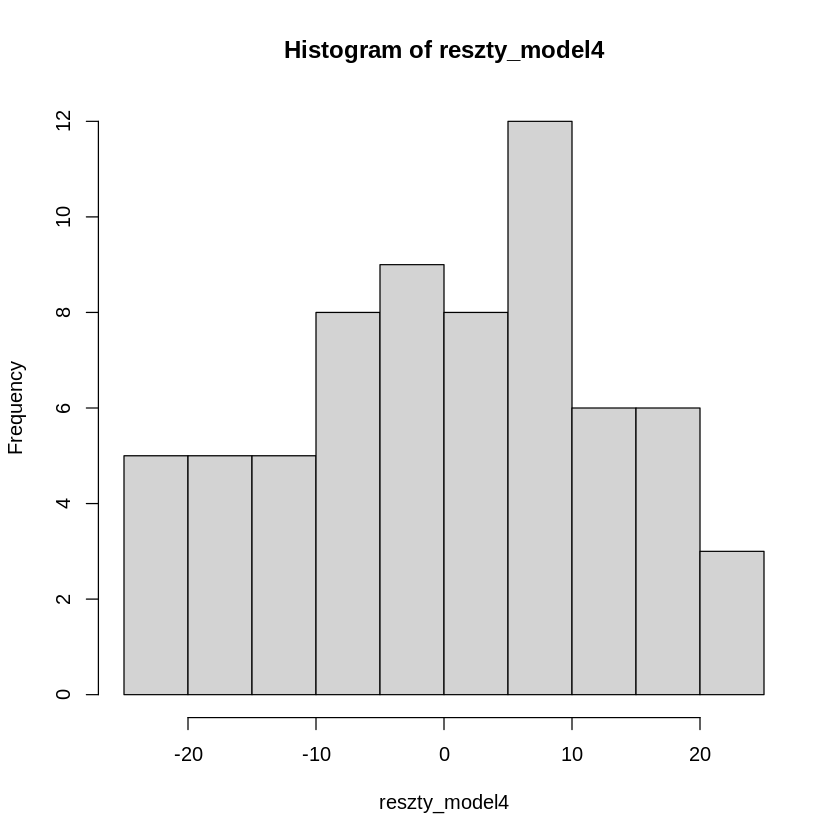

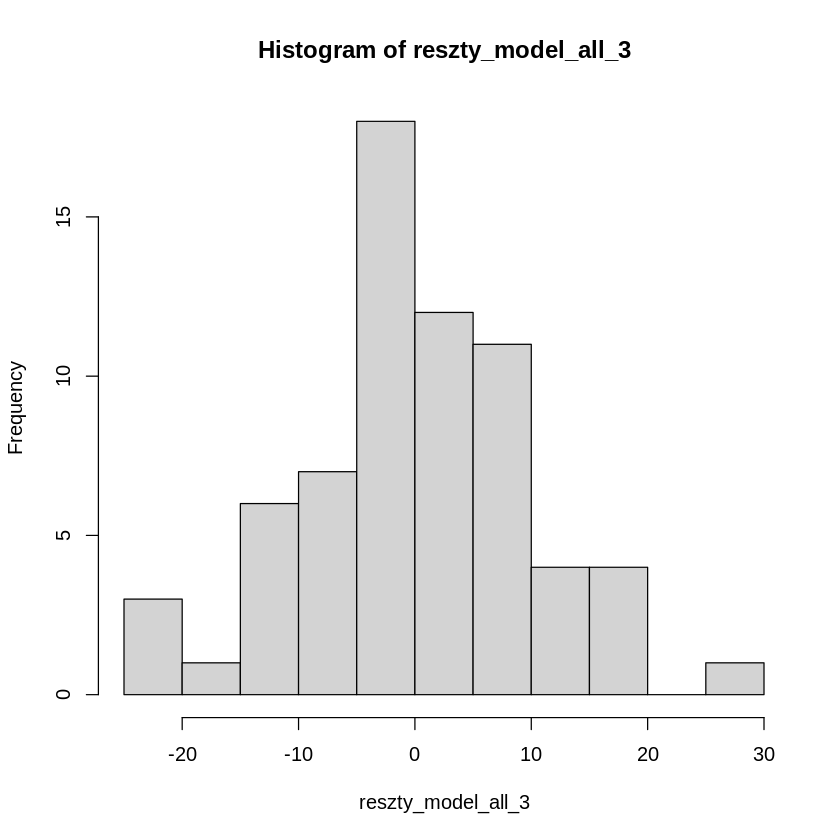

In [204]:
hist(reszty_model4)
hist(reszty_model_all_3)

rozkład normalny

In [174]:
shapiro.test(reszty_model4)
shapiro.test(reszty_model_all_3)
#H0 normalność
#H1 brak
# brak podstaw do odrzucenia H0


	Shapiro-Wilk normality test

data:  reszty_model4
W = 0.97211, p-value = 0.1367



	Shapiro-Wilk normality test

data:  reszty_model_all_3
W = 0.98578, p-value = 0.6427


symetria rozkładu reszt

In [293]:
skewness(reszty_model4)
skewness(reszty_model_all_3)

[1] -0.1845482

[1] 0.0431525

In [176]:
#H0 średnia równa 0
#H1 inna
# brak podstaw do odrzucenia H0
t.test(reszty_model4)
t.test(reszty_model_all_3)


	One Sample t-test

data:  reszty_model4
t = -5.8346e-16, df = 66, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.02087  3.02087
sample estimates:
   mean of x 
-8.82793e-16 



	One Sample t-test

data:  reszty_model_all_3
t = 1.3723e-17, df = 66, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.393595  2.393595
sample estimates:
   mean of x 
1.645236e-17 


autokorelacja

In [183]:
#H0 brak autokorelacji rzędu 1 -> jest 0
#H1 autokorelacja reszt
# odrzucamy H0, w modelu występuje autokorelacja reszt pierwszego rzędu
dwtest(model4)

#autokorelacja wyższego rzędu
coeftest(bgtest(model4, order = 10))

dwtest(model_all_3)
coeftest(bgtest(model_all_3, order = 10))


	Durbin-Watson test

data:  model4
DW = 0.34756, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



z test of coefficients:

                Estimate Std. Error z value  Pr(>|z|)    
(Intercept)    0.4401110  3.0247834  0.1455    0.8843    
owies         -0.0033253  0.0377541 -0.0881    0.9298    
lag(resid)_1   0.8932864  0.1351420  6.6100 3.844e-11 ***
lag(resid)_2  -0.0573358  0.1834987 -0.3125    0.7547    
lag(resid)_3   0.0411727  0.1825284  0.2256    0.8215    
lag(resid)_4   0.0563760  0.1870310  0.3014    0.7631    
lag(resid)_5  -0.0661710  0.1833110 -0.3610    0.7181    
lag(resid)_6  -0.1992066  0.1914268 -1.0406    0.2980    
lag(resid)_7  -0.1399493  0.1957312 -0.7150    0.4746    
lag(resid)_8   0.2983544  0.2135184  1.3973    0.1623    
lag(resid)_9   0.1028748  0.2215950  0.4642    0.6425    
lag(resid)_10 -0.1146907  0.1691445 -0.6781    0.4977    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Durbin-Watson test

data:  model_all_3
DW = 0.38699, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



z test of coefficients:

                Estimate Std. Error z value  Pr(>|z|)    
(Intercept)   -3.6251827  3.1520512 -1.1501  0.250102    
owies         -0.2148688  0.1077820 -1.9935  0.046201 *  
bydlo          2.5145561  1.2609807  1.9941  0.046138 *  
lag(resid)_1   0.7947151  0.1338769  5.9362 2.918e-09 ***
lag(resid)_2   0.0028176  0.1709326  0.0165  0.986849    
lag(resid)_3   0.0571927  0.1728462  0.3309  0.740729    
lag(resid)_4  -0.0420190  0.1731492 -0.2427  0.808257    
lag(resid)_5  -0.0549522  0.1723688 -0.3188  0.749874    
lag(resid)_6  -0.0808776  0.1780519 -0.4542  0.649659    
lag(resid)_7  -0.5097289  0.1840137 -2.7701  0.005605 ** 
lag(resid)_8   0.2550198  0.2231489  1.1428  0.253112    
lag(resid)_9   0.3988957  0.2239624  1.7811  0.074899 .  
lag(resid)_10 -0.4337957  0.1745663 -2.4850  0.012955 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [299]:
#transformacja Cochrana-Orcutta
rho <- acf(reszty_model4, plot = FALSE)$acf[2]

y_transformed <- trening$mleko - rho * lag(trening$mleko, 1)
x1_transformed <- trening$owies - rho * lag(trening$owies, 1)
x2_transformed <- trening$bydlo - rho * lag(trening$bydlo, 1)

model_transformed <- lm(y_transformed ~ x1_transformed + x2_transformed, data = trening)
summary(model_transformed)

dwtest(model_transformed)
#autokorelacja 1 rzedu dalej obecna (niedokładne rho)


Call:
lm(formula = y_transformed ~ x1_transformed + x2_transformed, 
    data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.3616  -3.5775  -0.4223   2.5745  14.3568 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.6030     2.4646   3.085  0.00302 ** 
x1_transformed   0.8254     0.1375   6.005 1.04e-07 ***
x2_transformed   8.0825     1.9318   4.184 9.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.755 on 63 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7012,	Adjusted R-squared:  0.6917 
F-statistic: 73.92 on 2 and 63 DF,  p-value: < 2.2e-16



	Durbin-Watson test

data:  model_transformed
DW = 1.5213, p-value = 0.01661
alternative hypothesis: true autocorrelation is greater than 0


Losowość

In [288]:
#test liczby serii
#H0 błąd modelu jest losowy
#H1 błąd modelu nie jest losowy
znaki4 <- ifelse(reszty_model4 > 0, 1, 0)
runs.test(as.factor(znaki4))


	Runs Test

data:  as.factor(znaki4)
Standard Normal = -5.7812, p-value = 7.417e-09
alternative hypothesis: two.sided


In [289]:
znaki3 <- ifelse(reszty_model_all_3 > 0, 1, 0)
runs.test(as.factor(znaki3))


	Runs Test

data:  as.factor(znaki3)
Standard Normal = -4.3009, p-value = 1.701e-05
alternative hypothesis: two.sided


jednorodność wariancji

In [292]:
#Homoskedastyczność
#H0 wariancje jednorodne
#H1 brak jednorodnośći
# odrzucamy H0
gqtest(model4)
gqtest(model_all_3)


	Goldfeld-Quandt test

data:  model4
GQ = 8.9089, df1 = 32, df2 = 31, p-value = 1.195e-08
alternative hypothesis: variance increases from segment 1 to 2



	Goldfeld-Quandt test

data:  model_all_3
GQ = 10.337, df1 = 31, df2 = 30, p-value = 3.193e-09
alternative hypothesis: variance increases from segment 1 to 2


weryfikacja liniowości

In [31]:
harvtest(model4)
harvtest(model_all_3)
#H0 model jest liniowy (liniowość reszt)
#H1 brak liniowości reszt
# odrzucamy H0


	Harvey-Collier test

data:  model4
HC = 6.2135, df = 64, p-value = 4.357e-08



	Harvey-Collier test

data:  model_all_3
HC = 3.4275, df = 63, p-value = 0.001078


In [32]:
raintest(model4)
harvtest(model_all_3)
#H0 model jest liniowy (liniowość reszt)
#H1 brak liniowości reszt
# brak podstaw do odrzucenia H0


	Rainbow test

data:  model4
Rain = 2.5312, df1 = 34, df2 = 31, p-value = 0.005284



	Harvey-Collier test

data:  model_all_3
HC = 3.4275, df = 63, p-value = 0.001078


In [33]:
resettest(model4)
harvtest(model_all_3)
#H0 model jest liniowy (liniowość reszt)
#H1 brak liniowości reszt
# odrzucamy H0


	RESET test

data:  model4
RESET = 3.4951, df1 = 2, df2 = 63, p-value = 0.03636



	Harvey-Collier test

data:  model_all_3
HC = 3.4275, df = 63, p-value = 0.001078


wykresy diagnostyczne

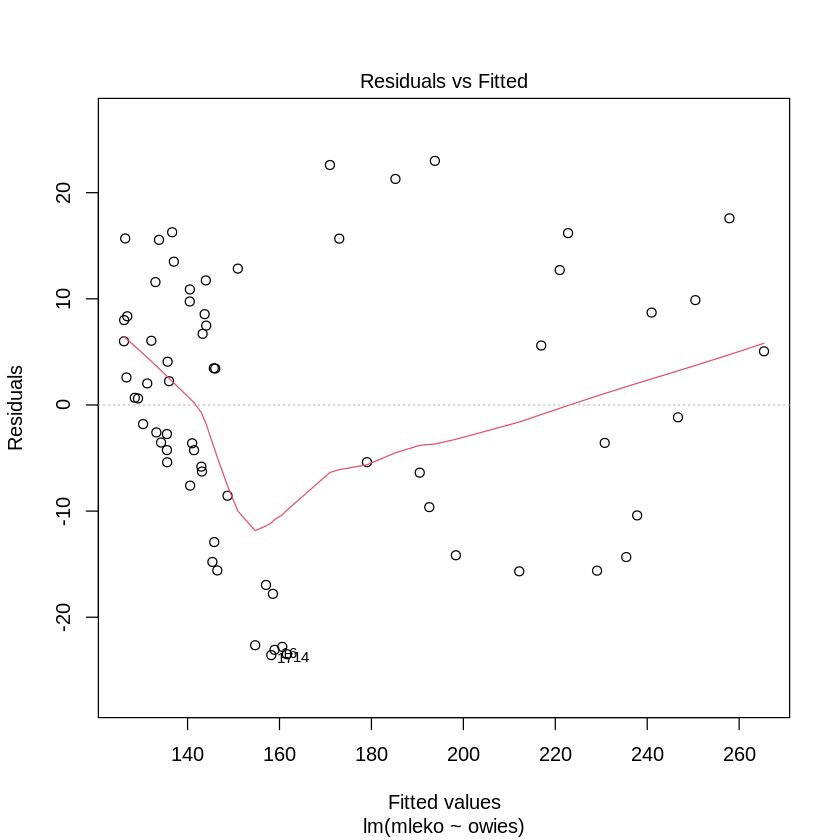

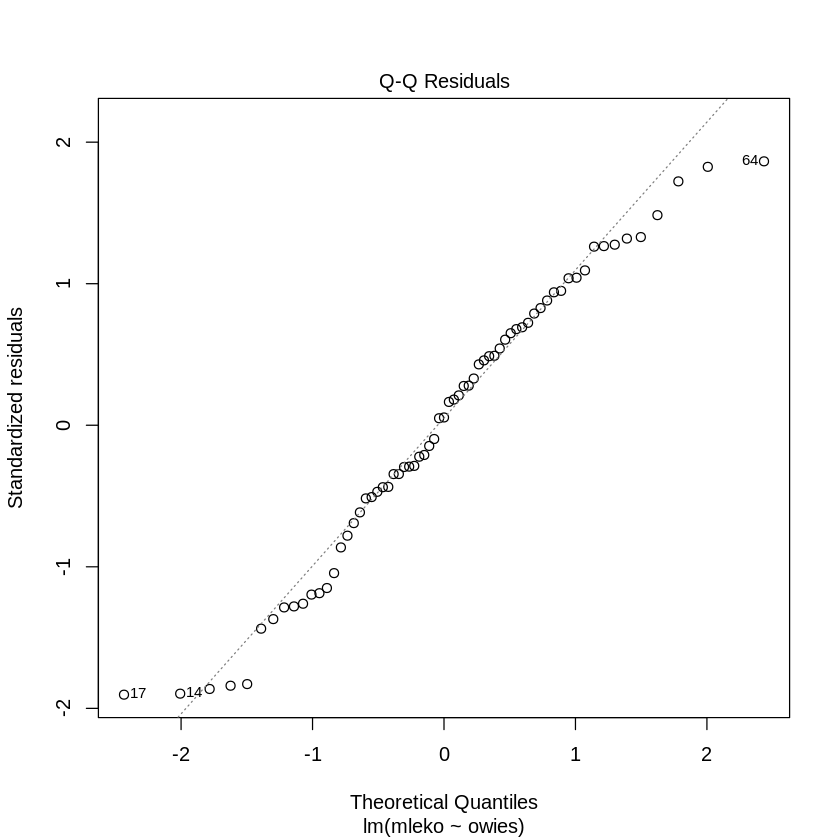

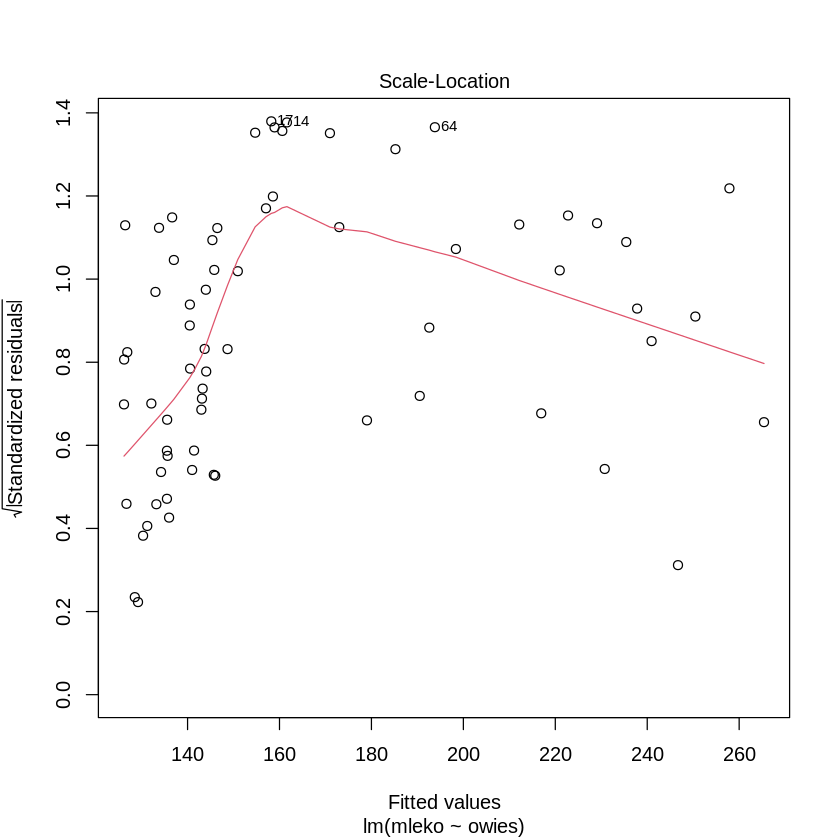

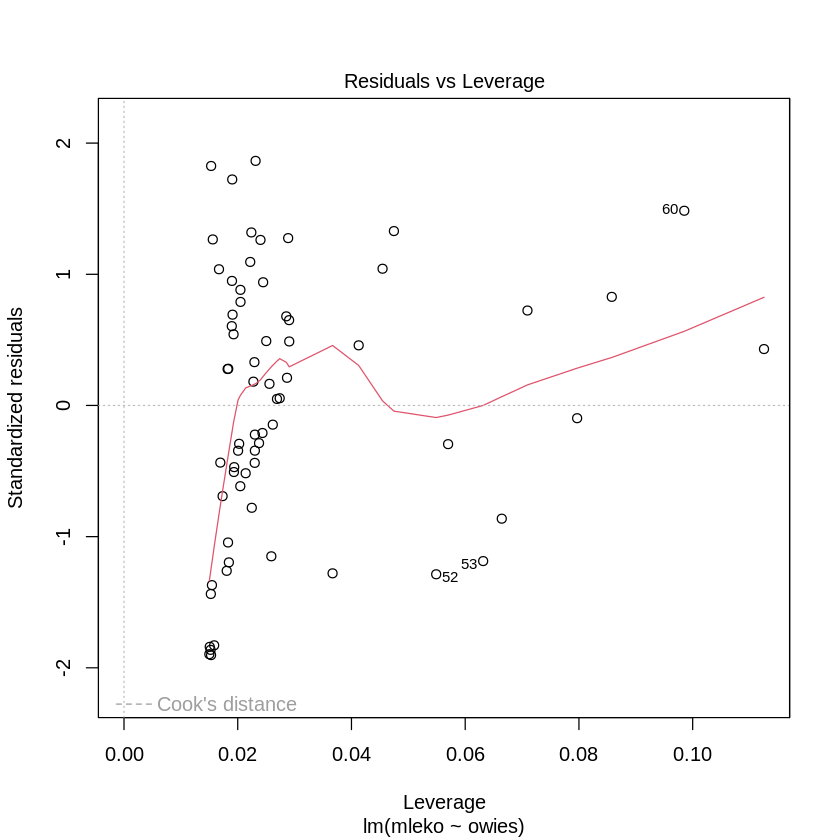

In [34]:
plot(model4)

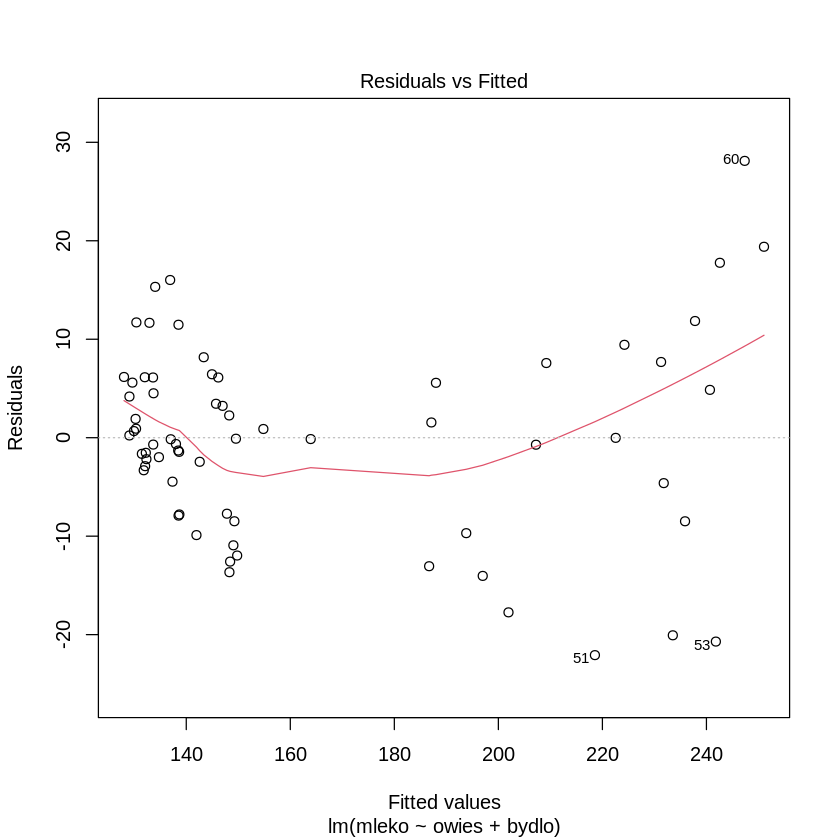

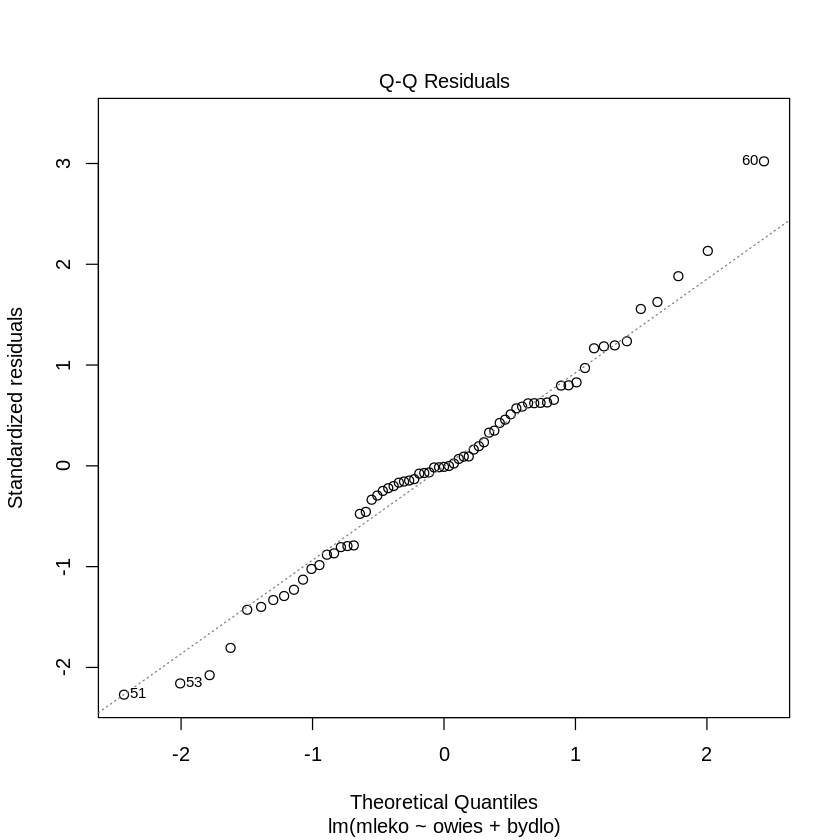

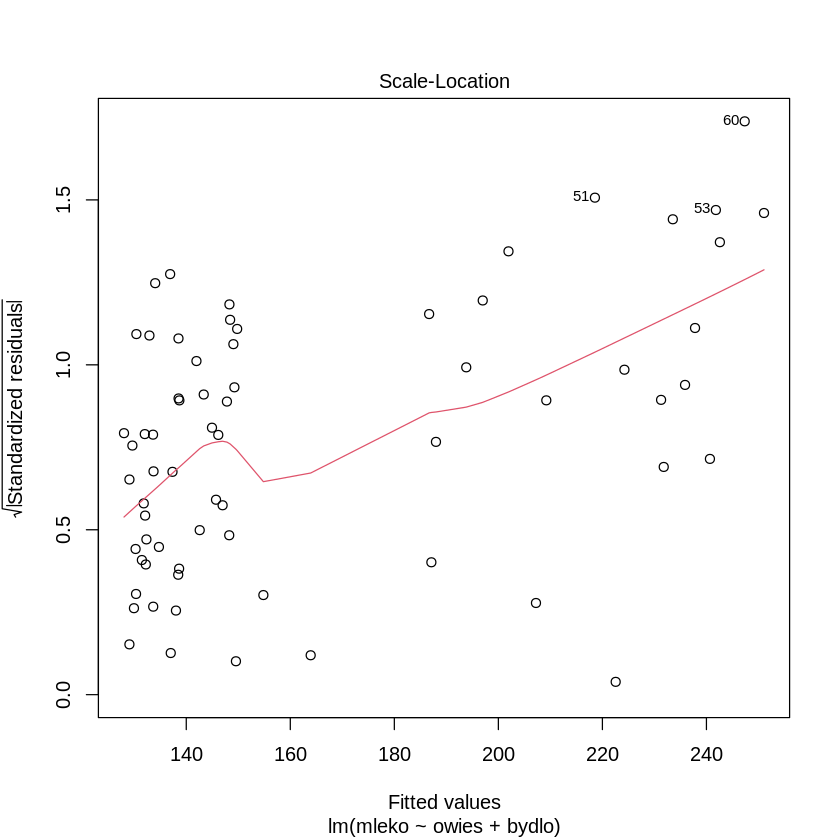

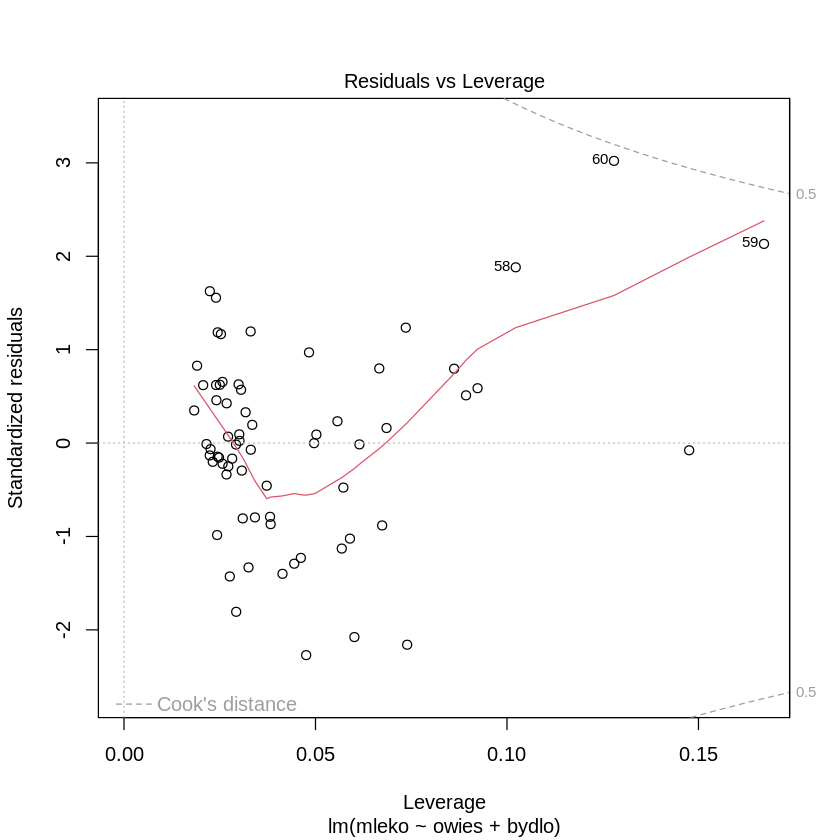

In [158]:
plot(model_all_3)

## Porównanie modeli - ANOVA

H0: model 2  nie jest istotnie lepszy od modelu 1

H1: model 2 jest istotnie lepszy

In [157]:
anova(model_all_3, model4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,64,6355.554,NA,NA,NA,NA
2,65,10123.162,-1,-3767.607,37.93955,5.396178e-08


###Prognozy

### prognoza punktowa

In [130]:
#model 1 - model4, mode2 - model_all_3
pred_test4 <- predict(model4, newdata=test)
pred_test_all_3 <- predict(model_all_3, newdata=test)

cor_test4 <- cor(test$mleko, pred_test4 )
cor_all_3 <- cor(test$mleko, pred_test_all_3)

cor_test4
cor_all_3

[1] 0.2787269

[1] 0.5451201

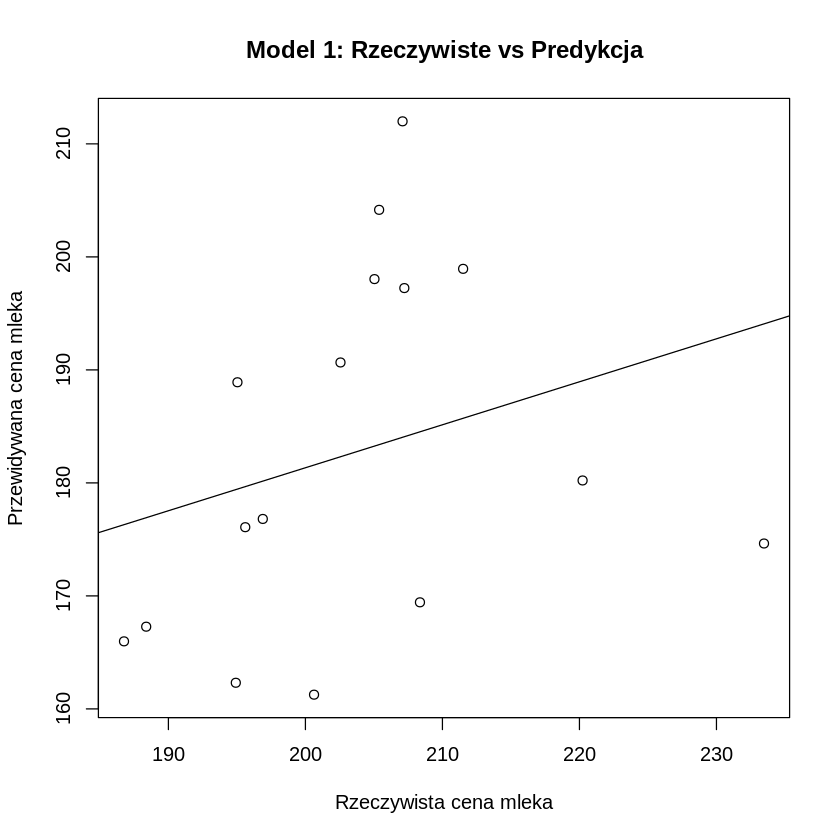

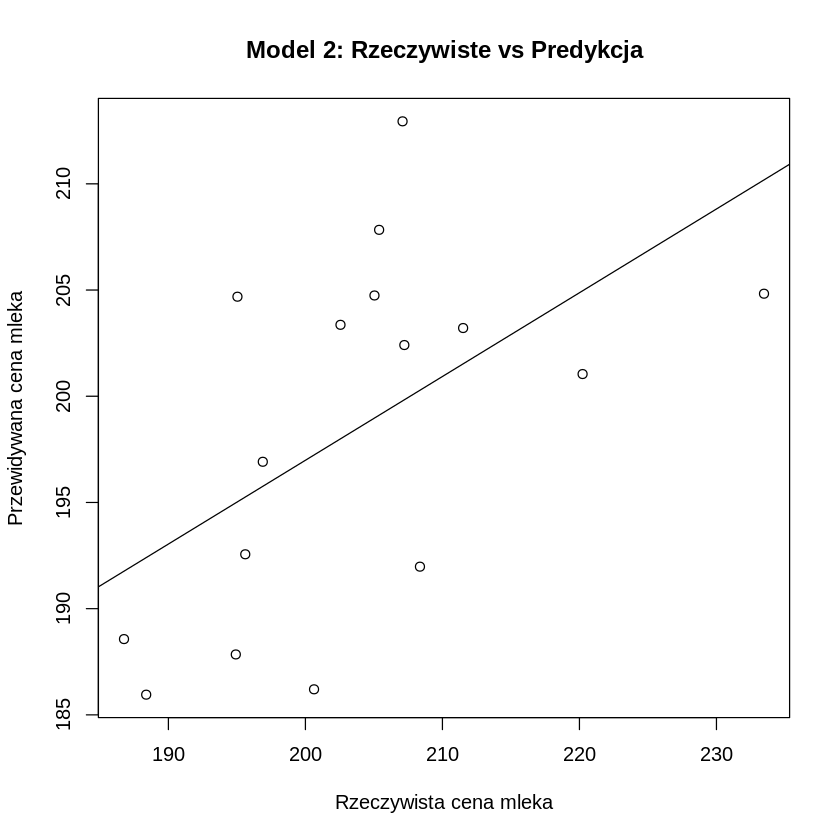

In [128]:
plot(test$mleko, pred_test4, main = "Model 1",
     xlab = "Rzeczywista cena mleka", ylab = "Przewidywana cena mleka")
abline(lm(pred_test4 ~ test$mleko))

plot(test$mleko, pred_test_all_3, main = "Model 2",
     xlab = "Rzeczywista cena mleka", ylab = "Przewidywana cena mleka")
abline(lm(pred_test_all_3 ~ test$mleko))

## Ocena dokładności prognoz

### Interpretacja wyników:
- **MAE** – pokazuje średnią różnicę (w jednostkach zmiennej zależnej) między prognozowanymi a rzeczywistymi wartościami.  
- **MSE** – uwzględnia kwadraty błędów, więc większe błędy są bardziej karane.  
- **RMSE** – podobne do MSE, ale w tej samej skali co dane.  
- **MAPE** – procentowy błąd prognozy, co ułatwia porównanie modeli.  

- **V-RMSE** – ocenia względne błędy prognozy
- **Theil U** – porównuje model do prognozy naiwnej
- **Janus J** – ocenia zdolność modelu do przewidywania tendencji


### Iteraycjne dobieranie zmiennych w kombinacje i generowanie oceny prognozy; zbieranie wynikow do tabeli

In [ ]:
#Poniższy kod zawiera dwa warianty dzielenia zbioró danych, sposób chronologiczny i losowy

#chronologicznie
dane_ocena <- dane_ocena[, c(6, 8, 9)]
train_data = dane_ocena[1:66,]
test_data = dane_ocena[67:83,]

#losowo
#train_indices <- sample(1:nrow(dane_ocena), size = 0.8 * nrow(dane_ocena))
#train_data <- na.omit(dane_ocena[train_indices, ])
#test_data <- na.omit(dane_ocena[-train_indices, ])

dim(train_data)
dim(test_data)
train_data

[1] 66  3

[1] 17  3

,owies_1dt,bydlo_1kg,mleko_1hl
,<dbl>,<dbl>,<dbl>
1,52.01,6.58,142.12
2,52.29,6.47,135.24
3,51.87,6.34,134.20
4,51.85,6.58,132.17
5,53.30,6.63,129.20
6,54.41,6.49,128.52
7,52.18,6.42,129.30
8,53.73,6.52,129.83
9,57.61,6.48,132.77


In [ ]:
ocena_modeli <- function(train, test) {
  target_var <- "mleko_1hl"
  predictors <- setdiff(names(train), target_var)
  comb_list <- unlist(lapply(1:length(predictors), function(i) {
    combn(predictors, i, simplify = FALSE)
  }), recursive = FALSE)

  # Prealokacja data frame'u results
  n_combinations <- length(comb_list)
  results <- data.frame(
    Zmienne = character(n_combinations),
    MAPE = numeric(n_combinations),
    V_RMSE = numeric(n_combinations),
    Theil = numeric(n_combinations),
    Janus = numeric(n_combinations),
    Ex_ante = numeric(n_combinations)
  )
  par(mfrow = c(2, 2)) # 2 wiersze, 2 kolumny (dostosuj do potrzeb)

  table_data_list <- list()

  # Pętla i wypełnianie prealokowanego data frame'u
  for (i in 1:length(comb_list)) {
    vars <- comb_list[[i]]
    formula_str <- paste(target_var, "~", paste(vars, collapse = " + "))
    model <- lm(as.formula(formula_str), data = train)

    # Ocena Ex-ante
    XT <- as.matrix(test[, vars]) # Macierz zmiennych objaśniających dla testu
    X <- as.matrix(train[, vars]) # Macierz zmiennych objaśniających dla train
    Se <- sigma(model) # Odchylenie standardowe reszt modelu

    V_T <- Se * sqrt(1 + XT %*% solve(t(X) %*% X) %*% t(XT))
    # Względny błąd ex-ante prognozy
    ex_ante_error <- (V_T / test[[target_var]]) * 100

    # Prognoza na zbiorze testowym
    test$predicted <- predict(model, newdata = test)
    # Tworzenie wykresu korelacji
    plot(test[[target_var]], test$predicted,
         xlab = "Wartości rzeczywiste",
         ylab = "Wartości przewidywane",
         main = paste("Korelacja dla modelu:", paste(vars, collapse = ", ")))
    abline(lm(test$predicted ~ test[[target_var]]), col = "red") # Dodajemy linię regresji

    # Obliczanie R^2 i współczynnika korelacji
    r2 <- summary(lm(test$predicted ~ test[[target_var]]))$r.squared
    correlation <- cor(test[[target_var]], test$predicted)

    # Tworzenie tabeli pod wykresem
    table_data <- data.frame(
      Zmienne = paste(vars, collapse = ", "),
      R2 = round(r2, 4),
      Korelacja = round(correlation, 4)
    )
    table_data_list[[i]] <- table_data

    ### ---------------Prognozowanie dla Theila------------------ ###

    # Oblicz średnie wartości rzeczywiste i prognozowane
    mean_y <- mean(test[[target_var]])
    mean_y_hat <- mean(test$predicted)

    # Oblicz odchylenia standardowe wartości rzeczywistych i prognozowanych
    sd_y <- sd(test[[target_var]])
    sd_y_hat <- sd(test$predicted)

    # Oblicz współczynnik korelacji
    correlation <- cor(test[[target_var]], test$predicted)

    # Oblicz I1, I2 i I3
    I1 <- (mean_y - mean_y_hat)^2 / sum((test[[target_var]] - mean_y)^2)  # Poprawiony mianownik
    I2 <- (sd_y - sd_y_hat)^2 / sum((test[[target_var]] - mean_y)^2)  # Poprawiony mianownik
    I3 <- 2 * (1 - correlation) * sd_y * sd_y_hat / sum((test[[target_var]] - mean_y)^2)  # Poprawiony mianownik



    # Oblicz Theil'a (poprawiony wzór)
    licznik <- sum((test[[target_var]] - test$predicted)^2)
    mianownik <- sum(test[[target_var]]^2)
    theil <- sqrt(licznik / mianownik)

    # Test: Czy suma kwadratów I1, I2 i I3 jest równa Theil'owi
    suma_skladników <- I1^2 + I2^2 + I3^2

    # Dodajemy test do tabeli - TRUE/FALSE
    results$Test_Theil[i] <- suma_skladników

    ### ---------------Prognozowanie dla Theila------------------ ###

    mape <- mean(abs((test[[target_var]] - test$predicted) / test[[target_var]])) * 100
    rmse <- sqrt(mean((test[[target_var]] - test$predicted)^2))
    v_rmse <- rmse / mean(test[[target_var]])
    licznik <- sum((test[[target_var]] - test$predicted)^2)
    mianownik <- sum(test[[target_var]]^2)
    theil <- sqrt(licznik / mianownik)
    janus <- sum(diff(test[[target_var]]) * diff(test$predicted)) / sum(diff(test[[target_var]])^2)

    results$Zmienne[i] <- paste(vars, collapse = ", ")
    results$MAPE[i] <- round(mape, 4)
    results$V_RMSE[i] <- round(v_rmse, 4)
    results$Theil[i] <- round(theil, 4)
    results$Janus[i] <- round(janus, 4)
    results$Ex_ante[i] <- round(mean(ex_ante_error), 4)
  }
  table_data <- do.call(rbind, table_data_list)
  return(table_data)
  #return(results)
}

Zmienne,R2,Korelacja
<chr>,<dbl>,<dbl>
owies_1dt,0.0951,0.3084
bydlo_1kg,0.3204,0.5660
"owies_1dt, bydlo_1kg",0.3441,0.5866


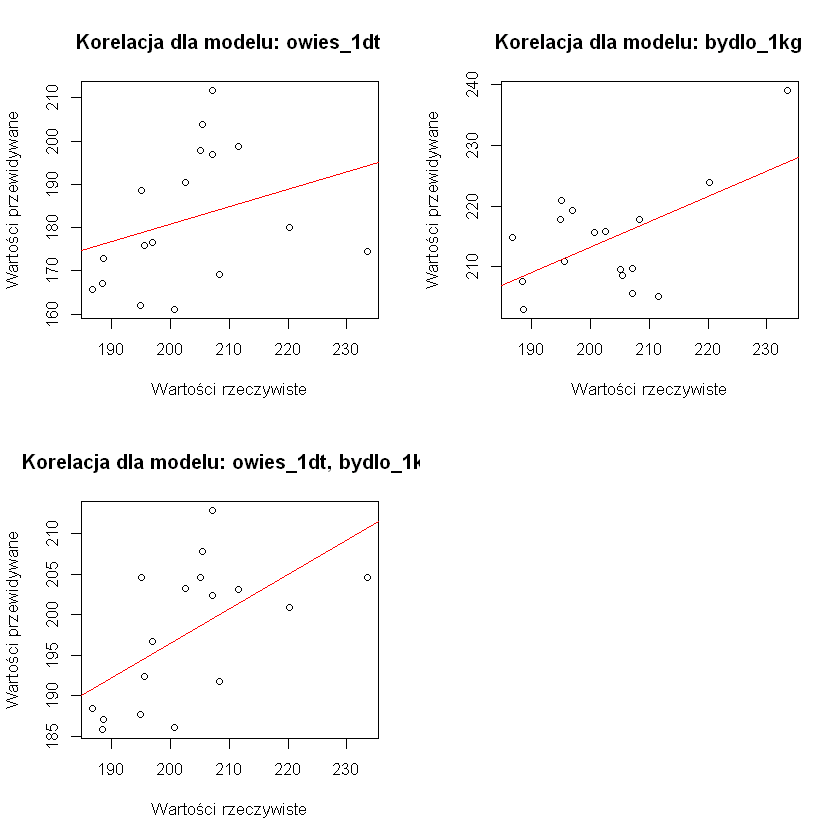

In [ ]:

# Uruchomienie funkcji
wyniki <- ocena_modeli(train_data, test_data)

# Wyświetlenie wyników
#datatable(wyniki)
#pander(wyniki)
#wyniki <- wyniki %>%
#  filter(Theil_U <= 0.03) %>%  # Wybierz wiersze
#  arrange(Janus_J)         # Posortuj po Janus_J (rosnąco)
wyniki